In [1]:
# !pip install openpyxl
# !pip install statsmodels

In [2]:
import random
import numpy as np
import pandas as pd
from math import sqrt
import statsmodels.api as sm
from scipy.stats import binom, chi2_contingency, fisher_exact, f_oneway, shapiro, levene
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt

### **Задача 1. Проверка эффективности рекламы.**
Фирма рассылает рекламные каталоги возможным заказчикам. По данным
аналитиков, вероятность того, что организация получившая каталог, закажет
рекламируемое изделие, равна 0,08.
Фирма разослала 1000 каталогов новой, улучшенной, формы и получила 100
заказов. Выяснить на уровне значимости 0.05, можно ли утверждать, что
обновлённая форма существенно лучше прежней.

**РЕШЕНИЕ**

**Выбранный статистический метод**: биномиальный тест, так как мы сравниваем доли бинарных переменных (заказ/не заказ) в одной группе.

$H_0: P_{new} = 0.08$

$H_1: P_{new} \gt 0.08$

In [3]:
P_0 = 0.08
n = 1000
orders = 100
alpha = 0.05

In [4]:
p_value = 1 - binom.cdf(orders - 1, n, P_0)
print(f"P-значение: {p_value:.4f}")

P-значение: 0.0135


In [5]:
if p_value < alpha:
    print("Отвергаем H0: обновлённая форма каталога лучше")
else:
    print("Нет оснований отвергать H0: улучшение не доказано")

Отвергаем H0: обновлённая форма каталога лучше


### **Задача 2. Сравнение стилей интервью**
Предположим, мы исследуем влияние стиля интервьюера (мы выделили 3
стиля - резкий, формальный и дружелюбный) на число респондентов,
которые согласятся дать ответы на личные вопросы в очном опросе. У нас
было 300 респондентов, которые были равномерно разделены на 3 группы.
В итоге в первой группе согласилось ответить 45 человек, во второй - 80, а в
третьей - 69. Что можно сказать о влиянии стиля на расположенность
респондентов к ответу?

**РЕШЕНИЕ**

**Выбранный статистический метод**: хи-квадрат тест, так как мы исследуем зависимость между двумя категориальными переменными: "стиль интервьюера" и "согласие респондента".

$H_0$: Стиль интервьюера не влияет на расположенность респондентов к ответу.

$H_1$: Стиль интервьюера влияет на расположенность респондентов к ответу.

In [6]:
observed = np.array([
    [45, 55],
    [80, 20],
    [69, 31]
])
alpha = 0.05

In [7]:
chi2, p_value, dof, expected = chi2_contingency(observed)

In [8]:
print(f"Хи-квадрат статистика: {chi2:.2f}")
print(f"P-значение: {p_value:.4f}")
print(f"Степени свободы: {dof}")
print("Ожидаемые частоты:")
print(expected)

Хи-квадрат статистика: 28.04
P-значение: 0.0000
Степени свободы: 2
Ожидаемые частоты:
[[64.66666667 35.33333333]
 [64.66666667 35.33333333]
 [64.66666667 35.33333333]]


In [9]:
if p_value < alpha:
    print("Отвергаем H0: стиль интервьюера влияет на расположенность респондентов к ответу")
else:
    print("Нет оснований отвергать H0: стиль интервьюера не влияет на расположенность респондентов к ответу")

Отвергаем H0: стиль интервьюера влияет на расположенность респондентов к ответу


### **Задача 3. Выявление экстрасенсорики.**
Предположим, что к нам пришёл человек и утверждает, что может на основе
предмета, принадлежащего кому-либо, определить, является ли данный
человек преступником. Мы провели строго контролируемый
рандомизированный эксперимент, после чего выяснилось следующее:
- Когда предмет принадлежал преступнику, человек определил это
верно в 7 случаях и неверно в 5
- Когда предмет принадлежал НЕ преступнику, человек определил это
верно в 40 случаях и неверно в 31

Что мы можем сказать о его экстрасенсорных способностях?

**РЕШЕНИЕ**

**Выбранный статистический метод**: хи-квадрат тест, так как он проверяет независимость между двумя категориальными переменными: "реальный статус" (преступник/не преступник) и "ответ человека" (угадал/не угадал).

$H_0$: Человек не обладает экстрасенсорными способностями

$H_1$: Человек обладает экстрасенсорными способностями

In [10]:
observed = np.array([
    [7, 5],
    [40, 31]
])
alpha = 0.05

In [11]:
chi2, p_value, dof, expected = chi2_contingency(observed)

In [12]:
print(f"Хи-квадрат статистика: {chi2:.2f}")
print(f"P-значение: {p_value:.4f}")
print(f"Степени свободы: {dof}")
print("Ожидаемые частоты:")
print(expected)

Хи-квадрат статистика: 0.00
P-значение: 1.0000
Степени свободы: 1
Ожидаемые частоты:
[[ 6.79518072  5.20481928]
 [40.20481928 30.79518072]]


In [13]:
if p_value < alpha:
    print("Отвергаем H0: человек обладает экстрасенсорными способностями")
else:
    print("Нет оснований отвергать H0: человек угадывает случайно")

Нет оснований отвергать H0: человек угадывает случайно


### **Задача 4. Проверка связи на основе малых данных.**
Предположим, мы хотим знать, связан ли пол с предпочтениями
политической партии. Мы берем простую случайную выборку из 25
избирателей и опрашиваем их об их предпочтениях в отношении
политических партий. В следующей таблице представлены результаты
опроса:

In [14]:
data = {
    'Democrat': [4, 8, 12],
    'Republican': [9, 4, 13],
    'Total': [13, 12, 25]
}

index = ['Male', 'Female', 'Total']

df = pd.DataFrame(data, index=index)
df

,Democrat,Republican,Total
Male,4,9,13
Female,8,4,12
Total,12,13,25


Необходимо проверить, связан ли пол с предпочтениями или нет.

**РЕШЕНИЕ**

**Выбранный статистический метод**: точный тест Фишера, так как он проверяет независимость между двумя категориальными переменными при малом количестве наблюдений (в данном задании асимптотика для хи-квадрат теста не выполняется (малый размер выборки и ожидаемые частоты в ячейках таблицы)).

$H_0$: Пол и предпочтения политической партии не связаны (независимы). 

$H_1$: Пол и предпочтения политической партии связаны (зависимы).

In [15]:
observed = [
    [4, 9],
    [8, 4]
]
alpha = 0.05

In [16]:
odds_ratio, p_value = fisher_exact(observed)

In [17]:
print(f"Отношение шансов: {odds_ratio:.4f}")
print(f"P-значение: {p_value:.4f}")

Отношение шансов: 0.2222
P-значение: 0.1152


In [18]:
if p_value < alpha:
    print("Отвергаем H0: пол связан с предпочтениями политической партии")
else:
    print("Нет оснований отвергать H0: пол и предпочтения политической партии не связаны")

Нет оснований отвергать H0: пол и предпочтения политической партии не связаны


### **Задача 5. Сравнение эффективности программ подготовки к экзаменам.**
Предположим, что мы хотим узнать, одинаковы ли по эффективности три
разных программ подготовки к экзаменам. Ниже приведена таблица с
оценками студентов, обучавшихся по соответственным программам.
Проведите анализ того, различаются ли программы по эффективности и
предположите, какая из них наилучшая/наихудшая. Оба пункта следует
подкрепить соответствующими методами.

In [22]:
df = pd.read_excel('table_2_5.xlsx')
df

,Group 1,Group 2,Group 3
0,85,91,79
1,86,92,78
2,88,93,88
3,75,85,94
4,78,87,82
5,94,84,85
6,98,82,83
7,79,88,85
8,71,95,82
9,80,96,81


**РЕШЕНИЕ**

**Выбранный статистический метод**: ANOVA и тест Тьюки, так как нам нужно сравнить средние значения между группами, для чего подходит ANOVA, а затем для анализа результатов, полученных с помощью ANOVA, будет использован тест Кьюки для попарного сравнения групп.

$H_0$: Все три программы подготовки к экзаменам одинаково эффективны (средние оценки в группах равны)
 
$H_1$: Средние оценки в группах различаются (хотя бы одна программа отличается по эффективности)

In [24]:
# Проверка нормальности остатков (тест Шапиро-Уилка)
for group in df.keys():
    stat, p = shapiro(df[group])
    if p < 0.05:
        print(f"Тест Шапиро-Уилка для {group}: p-значение = {p:.4f} => остатки распределены ненормально")
    else:
        print(f"Тест Шапиро-Уилка для {group}: p-значение = {p:.4f} => остатки распределены нормально")

Тест Шапиро-Уилка для Group 1: p-значение = 0.9053 => остатки распределены нормально
Тест Шапиро-Уилка для Group 2: p-значение = 0.7314 => остатки распределены нормально
Тест Шапиро-Уилка для Group 3: p-значение = 0.3285 => остатки распределены нормально


In [25]:
# Проверка гомогенности дисперсий (тест Левена)
stat, p = levene(df['Group 1'], df['Group 2'], df['Group 3'])
if p < 0.05:
    print(f"Тест Левена: p-значение = {p:.4f} => дисперсии в группах неоднородны")
else:
    print(f"Тест Левена: p-значение = {p:.4f} => дисперсии в группах однородны")

Тест Левена: p-значение = 0.0806 => дисперсии в группах однородны


Оба условия выполняются, можно использовать ANOVA

In [26]:
f_stat, p_value = f_oneway(df['Group 1'], df['Group 2'], df['Group 3'])
if p < 0.05:
    print(f"ANOVA: F-статистика = {f_stat:.4f}, p-значение = {p_value:.4f} => Отвергаем H0: средние оценки в группах различаются")
else:
    print(f"ANOVA: F-статистика = {f_stat:.4f}, p-значение = {p_value:.4f} => Нет оснований отвергать H0: все три программы подготовки к экзаменам одинаково эффективны")

ANOVA: F-статистика = 2.8544, p-значение = 0.0751 => Нет оснований отвергать H0: все три программы подготовки к экзаменам одинаково эффективны


In [27]:
stacked_data = df.stack().reset_index()
stacked_data.columns = ['Index', 'Group', 'Score']
res = pairwise_tukeyhsd(stacked_data['Score'], stacked_data['Group'])
print(res)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
Group 1 Group 2      5.9 0.1044  -0.997 12.797  False
Group 1 Group 3      0.3 0.9936  -6.597  7.197  False
Group 2 Group 3     -5.6 0.1283 -12.497  1.297  False
-----------------------------------------------------


На основе теста Тьюки можно сделать вывод, что нет статистически значимых различий между группами. Однако можно сделать предположения о том, какая программа может быть "лучше" или "хуже" на основе сравнения средних значений.

Таким образом:

- **Наилучшая программа** : Group 2
- **Наихудшая программа** : Group 1

Однако так как все различия между программами статистически незначимы, поэтому такие выводы носят предположительный характер.

### **Задача 6. Сравнение эффективности стратегий выращивания растений**
Было проведено исследование эффективности различных стратегий посева. В
исследовании участвовали две категорные переменные: используемое
удобрение и плотность посадки. Выяснить, есть ли различие между разными
вариантами взращивания, а также провести post-hoc анализ на основе
визуализации результатов, который позволит выяснить, как соотносится
эффективность стратегий. Оба пункта подкрепить соответствующими
тестами.

Данные находятся в файле Task6_data.csv

**РЕШЕНИЕ**

**Выбранный статистический метод**: ANOVA и тест Тьюки, так как ANOVA используется для сравнения средних значений между группами, а затем для анализа результатов, полученных с помощью ANOVA, будет использован тест Кьюки для попарного сравнения групп.

In [28]:
df = pd.read_csv('Task6_data.csv')
df.head()

,density,block,fertilizer,yield
0,1,1,1,177.228692
1,2,2,1,177.550041
2,1,3,1,176.408462
3,2,4,1,177.703625
4,1,1,1,177.125486


$H_0$: Нет значимых различий в урожайности между стратегиями взращивания

$H_1$: Существуют значимые различия в урожайности между стратегиями взращивания

In [29]:
df.rename(columns={'yield': 'Yield'}, inplace=True)
df.head()

,density,block,fertilizer,Yield
0,1,1,1,177.228692
1,2,2,1,177.550041
2,1,3,1,176.408462
3,2,4,1,177.703625
4,1,1,1,177.125486


In [30]:
print(df.groupby(['density', 'fertilizer'])['Yield'].describe())

                    count        mean       std         min         25%  \
density fertilizer                                                        
1       1            16.0  176.439598  0.586100  175.360840  176.091059   
        2            16.0  176.778288  0.541398  175.747546  176.433436   
        3            16.0  177.135608  0.510261  176.300517  176.978884   
2       1            16.0  177.074491  0.641108  175.882780  176.808027   
        2            16.0  177.088139  0.580310  176.044342  176.863942   
        3            16.0  177.576732  0.614552  176.430830  177.155771   

                           50%         75%         max  
density fertilizer                                      
1       1           176.256983  176.841098  177.479507  
        2           176.749795  177.206566  177.580683  
        3           177.109716  177.460317  178.141644  
2       1           177.045854  177.345257  178.357441  
        2           177.004950  177.354651  178.134605  


In [31]:
model = ols('Yield ~ C(density) * C(fertilizer)', data=df).fit()

In [32]:
# Проверка нормальности остатков (тест Шапиро-Уилка)
residuals = model.resid
stat, p = shapiro(residuals)
if p < 0.05:
    print(f"Тест Шапиро-Уилка: p-значение = {p:.4f} => остатки распределены ненормально")
else:
    print(f"Тест Шапиро-Уилка: p-значение = {p:.4f} => остатки распределены нормально")

Тест Шапиро-Уилка: p-значение = 0.3601 => остатки распределены нормально


In [33]:
# Проверка гомогенности дисперсий (тест Левена)
groups = df.groupby(['density', 'fertilizer'])['Yield'].apply(list)
stat, p = levene(*groups)
if p < 0.05:
    print(f"Тест Левена: p-значение = {p:.4f} => дисперсии в группах неоднородны")
else:
    print(f"Тест Левена: p-значение = {p:.4f} => дисперсии в группах однородны")

Тест Левена: p-значение = 0.9768 => дисперсии в группах однородны


Оба условия выполняются, можно использовать ANOVA

In [34]:
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Table:")
print(anova_table)


ANOVA Table:
                             sum_sq    df          F    PR(>F)
C(density)                 5.121681   1.0  15.194517  0.000186
C(fertilizer)              6.068047   2.0   9.001052  0.000273
C(density):C(fertilizer)   0.427818   2.0   0.634605  0.532500
Residual                  30.336687  90.0        NaN       NaN


**Вывод на основе таблицы ANOVA**:

1. Плотность посадки (density) :
- Значимо влияет на урожайность (p < 0.05 => отвергаем $H_0$).
- Различия в плотности посадки приводят к различиям в урожайности.

2. Тип удобрения (fertilizer) :
- Значимо влияет на урожайность (p < 0.05 => отвергаем $H_0$).
- Разные типы удобрений приводят к различиям в урожайности.

3. Взаимодействие между плотностью и типом удобрения (density:fertilizer):
- Не оказывает значимого влияния на урожайность (p > 0.05 => нельзя отвергнуть $H_0$).
- Эффект плотности и удобрения можно рассматривать независимо друг от друга.

In [35]:
tukey_fertilizer = pairwise_tukeyhsd(endog=df['Yield'], groups=df['fertilizer'], alpha=0.05)
print("\nТест Тьюки для фактора fertilizer:")
print(tukey_fertilizer)


Тест Тьюки для фактора fertilizer:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.1762 0.4955 -0.1937 0.5461  False
     1      3   0.5991 0.0006  0.2292  0.969   True
     2      3    0.423 0.0209  0.0531 0.7928   True
---------------------------------------------------


In [36]:
tukey_density = pairwise_tukeyhsd(endog=df['Yield'], groups=df['density'], alpha=0.05)
print("\nТест Тьюки для фактора density:")
print(tukey_density)


Тест Тьюки для фактора density:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2    0.462 0.0005 0.2083 0.7157   True
--------------------------------------------------


Text(0, 0.5, 'Урожайность')

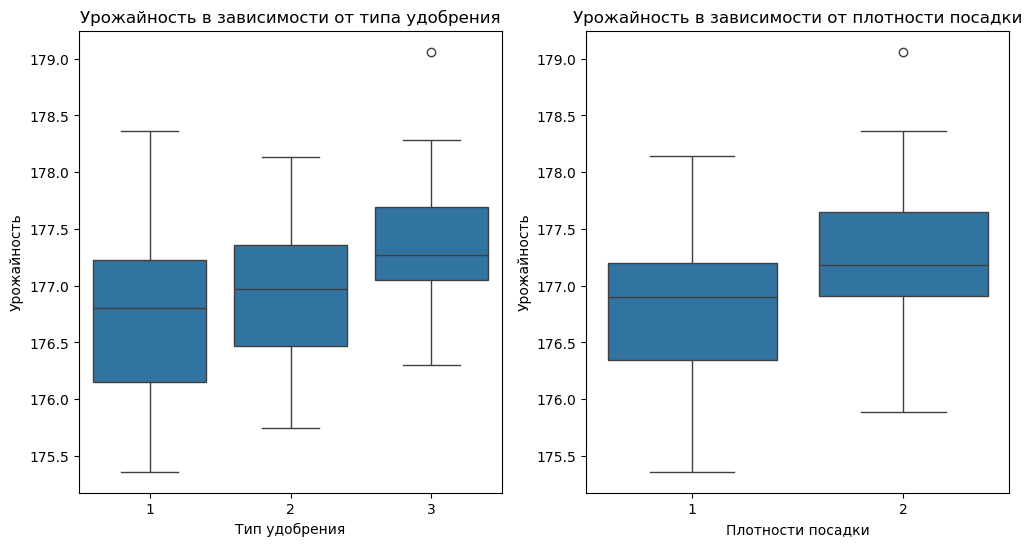

In [37]:
plt.figure(figsize=(12,6))

# Boxplot для fertilizer
plt.subplot(1, 2, 1)
sns.boxplot(x='fertilizer', y='Yield', data=df)
plt.title("Урожайность в зависимости от типа удобрения")
plt.xlabel("Тип удобрения")
plt.ylabel("Урожайность")

# Boxplot для density
plt.subplot(1, 2, 2)
sns.boxplot(x='density', y='Yield', data=df)
plt.title("Урожайность в зависимости от плотности посадки")
plt.xlabel("Плотности посадки")
plt.ylabel("Урожайность")

**Интерпретация для сравнения урожайности в зависимости от типа удобрения:**

- Урожайность при использовании удобрения 1 и удобрения 2 статистически не отличается (reject = False)
- Урожайность при использовании удобрения 3 статистически выше, чем при использовании удобрения 1 (reject = True)
- Урожайность при использовании удобрения 3 статистически выше, чем при использовании удобрения 2 (reject = True)
- Удобрение 3 показывает наибольшую урожайность , а удобрения 1 и 2 имеют схожие значения урожайности, которые статистически не отличаются друг от друга

**Интерпретация для сравнения урожайности в зависимости от плотности посадки:**
- Урожайность при плотности посадки 2 статистически выше, чем при плотности посадки 1 (reject = True)

**Для максимальной урожайности рекомендуется использовать**:
- Удобрение 3
- Плотность посадки 2